In [137]:
import h5py
import numpy as np
import os
import scipy
import verdict

In [2]:
import galaxy_dive.analyze_data.particle_data as particle_data
import galaxy_dive.plot_data.generic_plotter as generic_plotter
import galaxy_dive.utils.astro as astro_utils

In [12]:
import galaxy_dive.utils.data_operations as data_operations

# Find IDs

## Load Galaxy Data

In [3]:
snum = 600
sim_data_dir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv_old/output'
data_dir = '/scratch/03057/zhafen/linefinder_data/multiphysics/m12i_res7100_mhdcv/data'
halo_data_dir = '/scratch/03057/zhafen/halo_files/multiphysics/m12i_res7100_mhdcv'

In [4]:
s_data = particle_data.ParticleData(
    sdir = sim_data_dir,
    halo_data_dir = halo_data_dir,
    snum = snum,
    ptype = 4,
    main_halo_id = 0,
)

In [5]:
s_plotter = generic_plotter.GenericPlotter( s_data )

## Rotate

In [16]:
pos = data_operations.align_axes(
    s_data.get_data( 'P' ).transpose(),
    s_data.total_ang_momentum,
)

### Make sure it looks okay

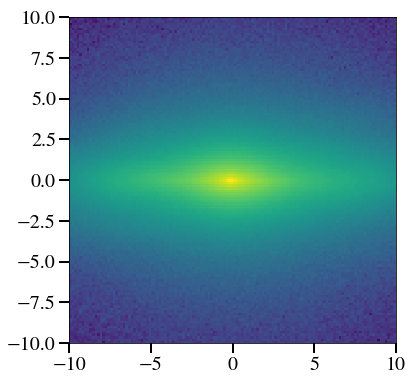

In [39]:
fig = plt.figure( figsize=(6,6), facecolor='w' )
ax = plt.gca()

_ = ax.hist2d(
    pos[:,1],
    pos[:,2],
    bins = [ np.linspace( -10, 10, 128 ), ] * 2,
    norm = matplotlib.colors.LogNorm(),
)

ax.set_aspect( 'equal' )


In [49]:
inside_galaxy = s_data.get_data( 'R' ) < s_data.averaging_frac * s_data.length_scale

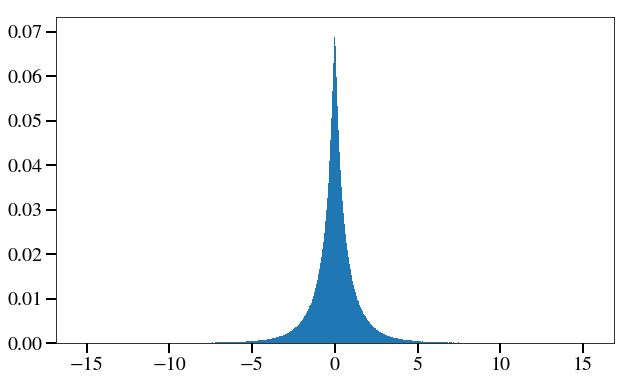

In [132]:
fig = plt.figure( figsize=(10,6), facecolor='w' )
ax = plt.gca()

hist, bins, _ = ax.hist(
    pos[:,2][inside_galaxy],
    bins = 2048,
    weights = s_data.get_data( 'M' )[inside_galaxy],
)

In [133]:
centers = bins[:-1] + 0.5 * ( bins[1] - bins[0] )
positive_centers = centers[centers>=0]
positive_hist = hist[centers>=0]

In [134]:
interp_fn = scipy.interpolate.interp1d( positive_hist, positive_centers )

In [136]:
scale_height = interp_fn( hist.max() / np.e )

# Save

In [138]:
data = verdict.Dict({
    'scale_height (kpc)': scale_height,
    'galaxy_angular_momentum (Msun*kpc*km/s)': s_data.total_ang_momentum
})

In [139]:
data.to_hdf5( './data/galaxy_stats.h5' )